In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modelo/modelo.csv


In [2]:
data = pd.read_csv('/kaggle/input/modelo/modelo.csv')
data.head()

,Ano,Trimestre,Mês,Dia,DIVIDA_ATUAL,ID_CONTA,NU_DIAS_ATRASO,Questão 2 - Base 2.QTD_PARCELAMENTO_12M,Questão 2 - Base 2.QTD_PARCELAMENTO_3M,Questão 2 - Base 2.QTD_PARCELAMENTO_6M,...,Questão 2 - Base 5.QTD_CP_1M,Questão 2 - Base 5.QTD_CP_3M,Questão 2 - Base 5.QTD_CP_6M,Questão 2 - Base 5.QTD_CPC_10D,Questão 2 - Base 5.QTD_CPC_1M,Questão 2 - Base 5.QTD_CPC_3M,Questão 2 - Base 5.QTD_CPC_6M,RESPOSTA,RESPOSTA - Copiar,VALOR_CRELIQ
0,2018,Trim 4,novembro,22,58213.12,1000156,2568,0,0,0,...,0.0,4.0,4.0,0.0,0.0,4.0,8.0,0,0,33531.92
1,2018,Trim 4,novembro,22,913.73,1000268,311,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,536.65
2,2018,Trim 4,novembro,22,8788.88,1000533,2568,0,0,0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0,0,5062.56
3,2018,Trim 4,novembro,22,14771.20,1000562,2160,0,0,0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0,0,9394.48
4,2018,Trim 4,novembro,22,107688.15,1000609,5292,0,0,0,...,9.0,18.0,27.0,0.0,18.0,18.0,18.0,0,0,79076.25


In [3]:
del data['ID_CONTA']
del data['Trimestre']
del data['RESPOSTA - Copiar']
del data['Ano']
del data['Mês']
del data['Dia']

In [4]:
data.head()

,DIVIDA_ATUAL,NU_DIAS_ATRASO,Questão 2 - Base 2.QTD_PARCELAMENTO_12M,Questão 2 - Base 2.QTD_PARCELAMENTO_3M,Questão 2 - Base 2.QTD_PARCELAMENTO_6M,Questão 2 - Base 3.LIMITE,Questão 2 - Base 5.QTD_ACIONAMENTO_1M,Questão 2 - Base 5.QTD_ACIONAMENTO_10D,Questão 2 - Base 5.QTD_ACIONAMENTO_3M,Questão 2 - Base 5.QTD_ACIONAMENTO_6M,Questão 2 - Base 5.QTD_CP_10D,Questão 2 - Base 5.QTD_CP_1M,Questão 2 - Base 5.QTD_CP_3M,Questão 2 - Base 5.QTD_CP_6M,Questão 2 - Base 5.QTD_CPC_10D,Questão 2 - Base 5.QTD_CPC_1M,Questão 2 - Base 5.QTD_CPC_3M,Questão 2 - Base 5.QTD_CPC_6M,RESPOSTA,VALOR_CRELIQ
0,58213.12,2568,0,0,0,7592,88.0,16.0,388.0,1344.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,8.0,0,33531.92
1,913.73,311,0,0,0,270,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,536.65
2,8788.88,2568,0,0,0,8136,80.0,64.0,124.0,776.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0,5062.56
3,14771.20,2160,0,0,0,2352,160.0,52.0,500.0,636.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0,9394.48
4,107688.15,5292,0,0,0,36396,333.0,27.0,1656.0,4014.0,0.0,9.0,18.0,27.0,0.0,18.0,18.0,18.0,0,79076.25


In [5]:
data.describe()

,DIVIDA_ATUAL,NU_DIAS_ATRASO,Questão 2 - Base 2.QTD_PARCELAMENTO_12M,Questão 2 - Base 2.QTD_PARCELAMENTO_3M,Questão 2 - Base 2.QTD_PARCELAMENTO_6M,Questão 2 - Base 3.LIMITE,Questão 2 - Base 5.QTD_ACIONAMENTO_1M,Questão 2 - Base 5.QTD_ACIONAMENTO_10D,Questão 2 - Base 5.QTD_ACIONAMENTO_3M,Questão 2 - Base 5.QTD_ACIONAMENTO_6M,Questão 2 - Base 5.QTD_CP_10D,Questão 2 - Base 5.QTD_CP_1M,Questão 2 - Base 5.QTD_CP_3M,Questão 2 - Base 5.QTD_CP_6M,Questão 2 - Base 5.QTD_CPC_10D,Questão 2 - Base 5.QTD_CPC_1M,Questão 2 - Base 5.QTD_CPC_3M,Questão 2 - Base 5.QTD_CPC_6M,RESPOSTA,VALOR_CRELIQ
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29082.000000,29999.000000,29999.000000
mean,32217.091269,2883.144271,6.182439,3.301010,4.912364,13828.574819,101.536586,25.603122,372.652018,723.339110,0.499037,1.842170,5.969844,11.024689,0.061378,0.253834,1.060415,2.099993,0.091570,19415.716781
std,53263.252030,3328.302359,14.725814,8.994594,11.994255,23185.588096,149.353995,40.084609,605.916054,1205.190211,2.328514,5.693185,14.415392,27.214423,0.710187,1.587625,3.910605,7.378993,1.156231,32225.109730
min,186.350000,181.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.960000
25%,1062.315000,285.000000,0.000000,0.000000,0.000000,494.000000,7.000000,2.000000,30.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,662.210000
50%,5708.560000,1568.000000,0.000000,0.000000,0.000000,2251.000000,31.000000,10.000000,128.000000,252.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3162.520000
75%,44536.770000,5292.000000,2.000000,0.000000,1.000000,17469.000000,153.000000,36.000000,522.000000,981.000000,0.000000,0.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27051.570000
max,775002.600000,12609.000000,135.000000,54.000000,108.000000,303372.000000,2961.000000,927.000000,28386.000000,59922.000000,45.000000,117.000000,234.000000,468.000000,27.000000,45.000000,99.000000,225.000000,27.000000,485525.610000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   DIVIDA_ATUAL                             29999 non-null  float64
 1   NU_DIAS_ATRASO                           29999 non-null  int64  
 2   Questão 2 - Base 2.QTD_PARCELAMENTO_12M  29999 non-null  int64  
 3   Questão 2 - Base 2.QTD_PARCELAMENTO_3M   29999 non-null  int64  
 4   Questão 2 - Base 2.QTD_PARCELAMENTO_6M   29999 non-null  int64  
 5   Questão 2 - Base 3.LIMITE                29999 non-null  int64  
 6   Questão 2 - Base 5.QTD_ACIONAMENTO_1M    29082 non-null  float64
 7   Questão 2 - Base 5.QTD_ACIONAMENTO_10D   29082 non-null  float64
 8   Questão 2 - Base 5.QTD_ACIONAMENTO_3M    29082 non-null  float64
 9   Questão 2 - Base 5.QTD_ACIONAMENTO_6M    29082 non-null  float64
 10  Questão 2 - Base 5.QTD_CP_10D            29082

In [41]:
def resp(x):
    if (x >0):
        return 1
    else:
        return 0

data['RESPOSTA'] = data.apply(lambda row : resp(row['RESPOSTA']),axis=1)

In [42]:
data.isnull().sum().sort_values(ascending = False)

DIVIDA_ATUAL                               0
NU_DIAS_ATRASO                             0
RESPOSTA                                   0
Questão 2 - Base 5.QTD_CPC_6M              0
Questão 2 - Base 5.QTD_CPC_3M              0
Questão 2 - Base 5.QTD_CPC_1M              0
Questão 2 - Base 5.QTD_CPC_10D             0
Questão 2 - Base 5.QTD_CP_6M               0
Questão 2 - Base 5.QTD_CP_3M               0
Questão 2 - Base 5.QTD_CP_1M               0
Questão 2 - Base 5.QTD_CP_10D              0
Questão 2 - Base 5.QTD_ACIONAMENTO_6M      0
Questão 2 - Base 5.QTD_ACIONAMENTO_3M      0
Questão 2 - Base 5.QTD_ACIONAMENTO_10D     0
Questão 2 - Base 5.QTD_ACIONAMENTO_1M      0
Questão 2 - Base 3.LIMITE                  0
Questão 2 - Base 2.QTD_PARCELAMENTO_6M     0
Questão 2 - Base 2.QTD_PARCELAMENTO_3M     0
Questão 2 - Base 2.QTD_PARCELAMENTO_12M    0
VALOR_CRELIQ                               0
dtype: int64

In [43]:
data = data.dropna()

In [44]:
data.isnull().sum().sort_values(ascending = False)

DIVIDA_ATUAL                               0
NU_DIAS_ATRASO                             0
RESPOSTA                                   0
Questão 2 - Base 5.QTD_CPC_6M              0
Questão 2 - Base 5.QTD_CPC_3M              0
Questão 2 - Base 5.QTD_CPC_1M              0
Questão 2 - Base 5.QTD_CPC_10D             0
Questão 2 - Base 5.QTD_CP_6M               0
Questão 2 - Base 5.QTD_CP_3M               0
Questão 2 - Base 5.QTD_CP_1M               0
Questão 2 - Base 5.QTD_CP_10D              0
Questão 2 - Base 5.QTD_ACIONAMENTO_6M      0
Questão 2 - Base 5.QTD_ACIONAMENTO_3M      0
Questão 2 - Base 5.QTD_ACIONAMENTO_10D     0
Questão 2 - Base 5.QTD_ACIONAMENTO_1M      0
Questão 2 - Base 3.LIMITE                  0
Questão 2 - Base 2.QTD_PARCELAMENTO_6M     0
Questão 2 - Base 2.QTD_PARCELAMENTO_3M     0
Questão 2 - Base 2.QTD_PARCELAMENTO_12M    0
VALOR_CRELIQ                               0
dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


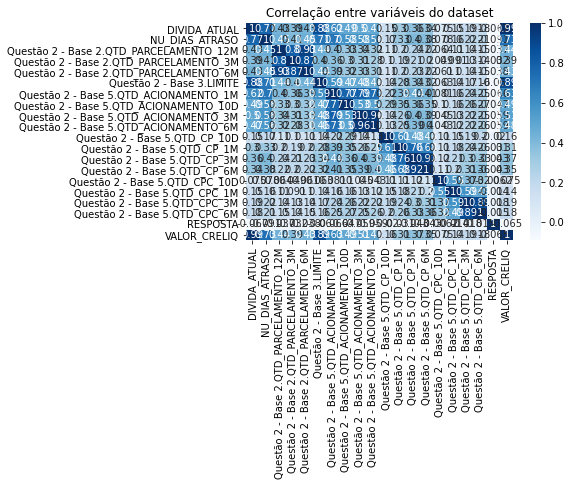

In [46]:
sns.heatmap(data.corr(),
            annot = True,
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [48]:
df = data[:]

In [49]:
del df['RESPOSTA']

In [50]:
y = data['RESPOSTA']
X = df

In [51]:
X.columns

Index(['DIVIDA_ATUAL', 'NU_DIAS_ATRASO',
       'Questão 2 - Base 2.QTD_PARCELAMENTO_12M',
       'Questão 2 - Base 2.QTD_PARCELAMENTO_3M',
       'Questão 2 - Base 2.QTD_PARCELAMENTO_6M', 'Questão 2 - Base 3.LIMITE',
       'Questão 2 - Base 5.QTD_ACIONAMENTO_1M',
       'Questão 2 - Base 5.QTD_ACIONAMENTO_10D',
       'Questão 2 - Base 5.QTD_ACIONAMENTO_3M',
       'Questão 2 - Base 5.QTD_ACIONAMENTO_6M',
       'Questão 2 - Base 5.QTD_CP_10D', 'Questão 2 - Base 5.QTD_CP_1M',
       'Questão 2 - Base 5.QTD_CP_3M', 'Questão 2 - Base 5.QTD_CP_6M',
       'Questão 2 - Base 5.QTD_CPC_10D', 'Questão 2 - Base 5.QTD_CPC_1M',
       'Questão 2 - Base 5.QTD_CPC_3M', 'Questão 2 - Base 5.QTD_CPC_6M',
       'VALOR_CRELIQ'],
      dtype='object')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

array([0.14200403, 0.11532136, 0.01881014, 0.01103   , 0.01351515,
       0.12231535, 0.07285914, 0.05665502, 0.0933471 , 0.10099831,
       0.00751375, 0.01131862, 0.0205897 , 0.03159044, 0.00324637,
       0.00319584, 0.01065721, 0.02005095, 0.1449815 ])

Text(0.5, 1.0, 'Importância de cada feature')

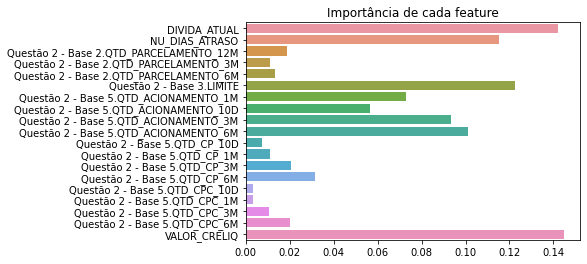

In [53]:
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [54]:
del X['Questão 2 - Base 2.QTD_PARCELAMENTO_12M']
del X['Questão 2 - Base 2.QTD_PARCELAMENTO_3M']
del X['Questão 2 - Base 2.QTD_PARCELAMENTO_6M']

In [55]:
del X['Questão 2 - Base 5.QTD_CP_10D']
del X['Questão 2 - Base 5.QTD_CP_1M']
del X['Questão 2 - Base 5.QTD_CP_3M']
del X['Questão 2 - Base 5.QTD_CP_6M']
del X['Questão 2 - Base 5.QTD_CPC_10D']
del X['Questão 2 - Base 5.QTD_CPC_1M']
del X['Questão 2 - Base 5.QTD_CPC_3M']
del X['Questão 2 - Base 5.QTD_CPC_6M']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
pred= model.predict(X_test)

In [69]:
model.score(X_test, y_test)

0.9742654719733278

In [58]:
from sklearn.metrics import confusion_matrix

In [63]:
print(confusion_matrix(y_test, pred))

[[7081   10]
 [ 176    4]]


In [60]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7091
           1       0.29      0.02      0.04       180

    accuracy                           0.97      7271
   macro avg       0.63      0.51      0.51      7271
weighted avg       0.96      0.97      0.96      7271

